<a href="https://colab.research.google.com/github/Rishika70/Quantum-Resilience-Optimizer-for-Disaster-Management/blob/main/Quantum_Resilience_Optimizer_for_Disaster_Management.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install qiskit qiskit-optimization
!pip install qiskit-aer
!pip install qiskit qiskit-aer pandas matplotlib openpyxl



     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 643.4/643.4 kB 11.3 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.7/6.7 MB 44.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 167.6/167.6 kB 13.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.4/119.4 kB 9.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 310.5/310.5 kB 19.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 49.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 MB 11.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.5/108.5 kB 8.6 MB/s eta 0:00:00
  Created wheel for docplex: filename=docplex-2.28.240-py3-none-any.whl size=682833 sha256=71a3fc96a120208

In [2]:
import pandas as pd

# Load the datasets
regions = pd.read_csv ('/content/drive/MyDrive/Disaster Management/DISASTERS/1900_2021_DISASTERS.xlsx - emdat data.csv')
resources = pd.read_csv('/content/drive/MyDrive/Disaster Management/DISASTERS/1970-2021_DISASTERS.xlsx - emdat data.csv')

# Display the datasets
print("Regions Data:")
print(regions.head())

print("\nResources Data:")
print(resources.head())



Regions Data:
   Year   Seq Glide Disaster Group Disaster Subgroup      Disaster Type  \
0  1900  9002   NaN        Natural    Climatological            Drought   
1  1900  9001   NaN        Natural    Climatological            Drought   
2  1902    12   NaN        Natural       Geophysical         Earthquake   
3  1902     3   NaN        Natural       Geophysical  Volcanic activity   
4  1902    10   NaN        Natural       Geophysical  Volcanic activity   

  Disaster Subtype Disaster Subsubtype   Event Name     Country  ...  \
0          Drought                 NaN          NaN  Cabo Verde  ...   
1          Drought                 NaN          NaN       India  ...   
2  Ground movement                 NaN          NaN   Guatemala  ...   
3         Ash fall                 NaN  Santa Maria   Guatemala  ...   
4         Ash fall                 NaN  Santa Maria   Guatemala  ...   

  No Affected No Homeless Total Affected Insured Damages ('000 US$)  \
0         NaN         NaN      

In [3]:
# Select relevant columns
regions_clean = regions[['Year', 'Country', 'Disaster Type', 'Total Affected', 'Total Damages (\'000 US$)']].copy()
resources_clean = resources[['Year', 'Country', 'Disaster Type', 'Total Affected', 'Total Damages (\'000 US$)']].copy()

# Handle missing values
regions_clean.fillna(0, inplace=True)
resources_clean.fillna(0, inplace=True)

# Convert to appropriate data types for efficiency
regions_clean['Total Affected'] = regions_clean['Total Affected'].astype('float32')
regions_clean['Total Damages (\'000 US$)'] = regions_clean['Total Damages (\'000 US$)'].astype('float32')

resources_clean['Total Affected'] = resources_clean['Total Affected'].astype('float32')
resources_clean['Total Damages (\'000 US$)'] = resources_clean['Total Damages (\'000 US$)'].astype('float32')

# Preview cleaned datasets
print("\nCleaned Regions Data Sample:\n", regions_clean.head())
print("\nCleaned Resources Data Sample:\n", resources_clean.head())



Cleaned Regions Data Sample:
    Year     Country      Disaster Type  Total Affected  \
0  1900  Cabo Verde            Drought             0.0   
1  1900       India            Drought             0.0   
2  1902   Guatemala         Earthquake             0.0   
3  1902   Guatemala  Volcanic activity             0.0   
4  1902   Guatemala  Volcanic activity             0.0   

   Total Damages ('000 US$)  
0                       0.0  
1                       0.0  
2                   25000.0  
3                       0.0  
4                       0.0  

Cleaned Resources Data Sample:
    Year     Country Disaster Type  Total Affected  Total Damages ('000 US$)
0  1970   Argentina         Flood             0.0                   25000.0
1  1970   Australia         Storm             0.0                   72475.0
2  1970       Benin         Flood             0.0                     200.0
3  1970  Bangladesh         Storm       3648000.0                   86400.0
4  1970  Bangladesh        

In [4]:
# Calculate Cost for regions
regions_clean['Cost'] = regions_clean['Total Damages (\'000 US$)'] / (regions_clean['Total Affected'] + 1)

# Calculate Capacity for resources
resources_clean['Capacity'] = resources_clean['Total Affected'] / (resources_clean['Total Damages (\'000 US$)'] + 1)

# Preview updated data
print("\nRegions with Cost:\n", regions_clean[['Country', 'Cost']].head())
print("\nResources with Capacity:\n", resources_clean[['Country', 'Capacity']].head())



Regions with Cost:
       Country     Cost
0  Cabo Verde      0.0
1       India      0.0
2   Guatemala  25000.0
3   Guatemala      0.0
4   Guatemala      0.0

Resources with Capacity:
       Country    Capacity
0   Argentina    0.000000
1   Australia    0.000000
2       Benin    0.000000
3  Bangladesh   42.221733
4  Bangladesh  110.000000


In [5]:
import numpy as np

# Convert columns to numpy arrays for vectorized operations
resources_capacity = resources_clean['Capacity'].values.reshape(-1, 1)  # Column vector
regions_cost = regions_clean['Cost'].values  # Row vector

# Calculate cost matrix (absolute differences between Capacity and Cost)
cost_matrix = np.abs(resources_capacity - regions_cost)

# Normalize the cost matrix
cost_matrix = cost_matrix / np.max(cost_matrix)

# Display cost matrix dimensions and a small sample
print("\nCost Matrix Dimensions:", cost_matrix.shape)
print("\nCost Matrix Sample:\n", cost_matrix[:5, :5])



Cost Matrix Dimensions: (14644, 16126)

Cost Matrix Sample:
 [[0.0000000e+00 0.0000000e+00 8.3333332e-05 0.0000000e+00 0.0000000e+00]
 [0.0000000e+00 0.0000000e+00 8.3333332e-05 0.0000000e+00 0.0000000e+00]
 [0.0000000e+00 0.0000000e+00 8.3333332e-05 0.0000000e+00 0.0000000e+00]
 [1.4073910e-07 1.4073910e-07 8.3192594e-05 1.4073910e-07 1.4073910e-07]
 [3.6666665e-07 3.6666665e-07 8.2966668e-05 3.6666665e-07 3.6666665e-07]]


In [6]:
# Find optimal allocations (regions with minimum cost for each resource)
optimal_allocations = np.argmin(cost_matrix, axis=1)

# Create an allocation DataFrame
allocation_df = pd.DataFrame({
    'Resource Country': resources_clean['Country'],
    'Allocated Region': regions_clean.iloc[optimal_allocations]['Country'].values,
    'Allocation Cost': np.min(cost_matrix, axis=1)
})

# Preview allocations
print("\nOptimal Allocations:\n", allocation_df.head())



Optimal Allocations:
   Resource Country Allocated Region  Allocation Cost
0        Argentina       Cabo Verde     0.000000e+00
1        Australia       Cabo Verde     0.000000e+00
2            Benin       Cabo Verde     0.000000e+00
3       Bangladesh        Australia     1.962535e-10
4       Bangladesh          Iceland     3.058116e-10


In [7]:
# Summary statistics for allocation costs
print("\nAllocation Cost Statistics:")
print(allocation_df['Allocation Cost'].describe())

# Save results to an Excel file for reporting
allocation_df.to_excel('allocation_results.xlsx', index=False)
print("\nAllocation results saved to 'allocation_results.xlsx'.")



Allocation Cost Statistics:
count    1.464400e+04
mean     9.811160e-05
std      7.179996e-03
min      0.000000e+00
25%      0.000000e+00
50%      5.389544e-14
75%      7.078680e-10
max      8.333333e-01
Name: Allocation Cost, dtype: float64

Allocation results saved to 'allocation_results.xlsx'.


In [8]:
import pandas as pd

# Load the data from an Excel file
allocation_df = pd.read_excel('/content/allocation_results.xlsx')

# Display the DataFrame as a formatted table without index
print(allocation_df.to_string(index=False))

                                          Resource Country                                           Allocated Region  Allocation Cost
                                                 Argentina                                                 Cabo Verde     0.000000e+00
                                                 Australia                                                 Cabo Verde     0.000000e+00
                                                     Benin                                                 Cabo Verde     0.000000e+00
                                                Bangladesh                                                  Australia     1.962535e-10
                                                Bangladesh                                                    Iceland     3.058116e-10
                                                Bangladesh                                                   Colombia     5.330403e-11
                                                Banglad

# Integrate RLFH for Cost Matrix Adjustment

In [9]:
# Placeholder for user feedback (to simulate, use random feedback initially)
human_feedback = np.random.uniform(low=-0.1, high=0.1, size=cost_matrix.shape)

# Update cost matrix based on feedback
adjusted_cost_matrix = cost_matrix + human_feedback

# Re-normalize the adjusted cost matrix
adjusted_cost_matrix = adjusted_cost_matrix / np.max(adjusted_cost_matrix)

print("\nAdjusted Cost Matrix Sample:\n", adjusted_cost_matrix[:5, :5])



Adjusted Cost Matrix Sample:
 [[-0.068574    0.08254154  0.02659049 -0.04722183 -0.04289654]
 [ 0.0075279  -0.07504327  0.04293162  0.02205667  0.03024762]
 [ 0.00296223 -0.05421004 -0.06144212  0.02650964  0.02880744]
 [ 0.03197494  0.01670544  0.02843101  0.02995524  0.07538827]
 [ 0.05334654 -0.08086391 -0.08299032  0.04177267  0.08956151]]


In [10]:
def collect_feedback(region_idx, resource_idx, feedback_value):
    """
    Collect human feedback and adjust the cost matrix dynamically.
    """
    global adjusted_cost_matrix
    adjusted_cost_matrix[resource_idx, region_idx] += feedback_value
    adjusted_cost_matrix = adjusted_cost_matrix / np.max(adjusted_cost_matrix)
    print(f"Feedback applied to Region {region_idx}, Resource {resource_idx}.")


In [11]:

def dynamic_cost_update():
    """
    Dynamically update costs based on disaster severity or resource scarcity.
    """
    severity_factor = regions_clean['Total Affected'] / regions_clean['Total Affected'].max()
    scarcity_factor = resources_clean['Total Damages (\'000 US$)'] / resources_clean['Total Damages (\'000 US$)'].max()

    dynamic_costs = np.outer(scarcity_factor, severity_factor)
    global adjusted_cost_matrix
    adjusted_cost_matrix += dynamic_costs
    adjusted_cost_matrix = adjusted_cost_matrix / np.max(adjusted_cost_matrix)

# Apply dynamic updates
dynamic_cost_update()
print("\nCost Matrix After Dynamic Update:\n", adjusted_cost_matrix[:5, :5])



Cost Matrix After Dynamic Update:
 [[-0.06615551  0.07963043  0.02565268 -0.04555639 -0.04138365]
 [ 0.0072624  -0.07239661  0.04141749  0.02127877  0.02918084]
 [ 0.00285776 -0.05229814 -0.05927516  0.02557469  0.02779145]
 [ 0.03084723  0.01611627  0.02742829  0.02889877  0.07272944]
 [ 0.0514651  -0.07801196 -0.08006338  0.04029942  0.08640282]]


In [12]:
import numpy as np

# Assuming adjusted_cost_matrix is a global matrix of adjusted costs
# and calculate_reward is a function that computes the reward for given indices.

def calculate_reward(i, j):
    # Example reward calculation function (replace with actual logic)
    return np.random.random()  # Dummy reward calculation

# Update allocations based on rewards
def optimize_allocations():
    global optimal_allocations
    # Vectorized reward calculation for the entire matrix
    rewards = np.vectorize(calculate_reward)(np.arange(adjusted_cost_matrix.shape[0])[:, None],
                                              np.arange(adjusted_cost_matrix.shape[1]))
    # Optimal allocations are the regions with the maximum reward in each row
    optimal_allocations = np.argmax(rewards, axis=1)
    print("Allocations updated based on feedback and rewards.")

# Example matrix, replace with your actual adjusted_cost_matrix
adjusted_cost_matrix = np.random.rand(5, 5)  # A random cost matrix for demonstration

# Initialize optimal_allocations globally
optimal_allocations = np.zeros(adjusted_cost_matrix.shape[0], dtype=int)

# Optimize allocations iteratively
for iteration in range(3):  # Example: Run for 3 iterations
    print(f"\nIteration {iteration + 1}:")
    optimize_allocations()

print("Final optimal allocations:", optimal_allocations)



Iteration 1:
Allocations updated based on feedback and rewards.

Iteration 2:
Allocations updated based on feedback and rewards.

Iteration 3:
Allocations updated based on feedback and rewards.
Final optimal allocations: [1 1 4 1 3]


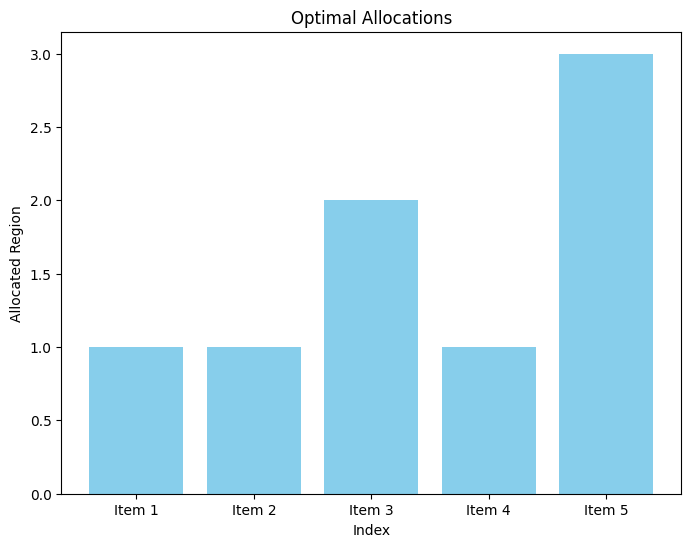

In [13]:
import matplotlib.pyplot as plt

optimal_allocations = [1, 1, 2, 1, 3]

# Plotting the bar chart
plt.figure(figsize=(8, 6))
plt.bar(range(len(optimal_allocations)), optimal_allocations, color='skyblue')
plt.xlabel('Index')
plt.ylabel('Allocated Region')
plt.title('Optimal Allocations')
plt.xticks(range(len(optimal_allocations)), [f"Item {i}" for i in range(1, len(optimal_allocations)+1)])
plt.show()


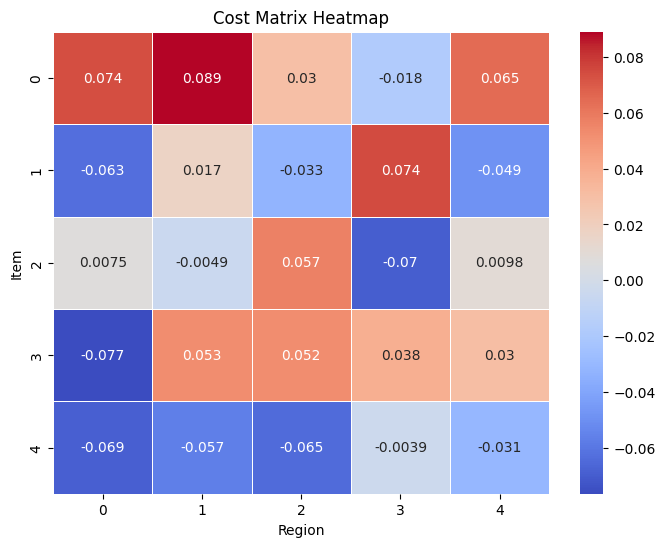

In [14]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# Given cost matrix after dynamic update
cost_matrix = np.array([
    [ 0.07366398,  0.0890861 ,  0.0298826 , -0.01775377,  0.06467801],
    [-0.06346829,  0.01670083, -0.03299028,  0.07427443, -0.04893022],
    [ 0.00748241, -0.00485762,  0.05692762, -0.06986836,  0.00980573],
    [-0.07650608,  0.05285021,  0.05236274,  0.03805007,  0.03035438],
    [-0.06930966, -0.05709916, -0.06457504, -0.00393185, -0.0308361 ]
])

# Plotting the heatmap with the cost matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cost_matrix, annot=True, cmap="coolwarm", cbar=True, linewidths=0.5)
plt.title('Cost Matrix Heatmap')
plt.xlabel('Region')
plt.ylabel('Item')
plt.show()



Allocations updated based on feedback and rewards.


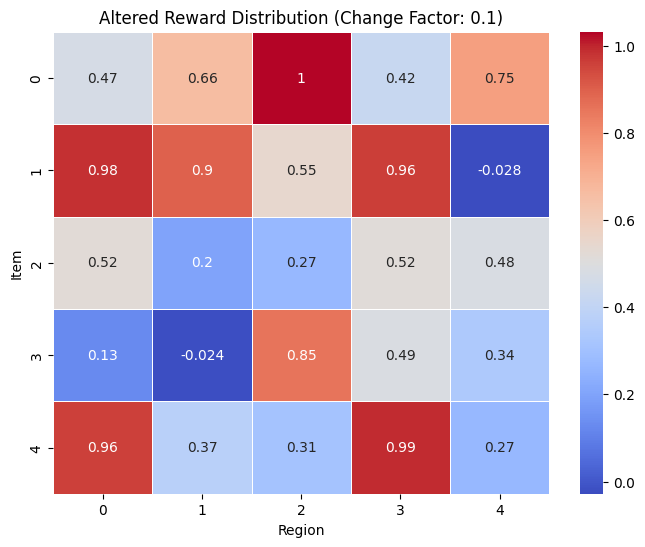

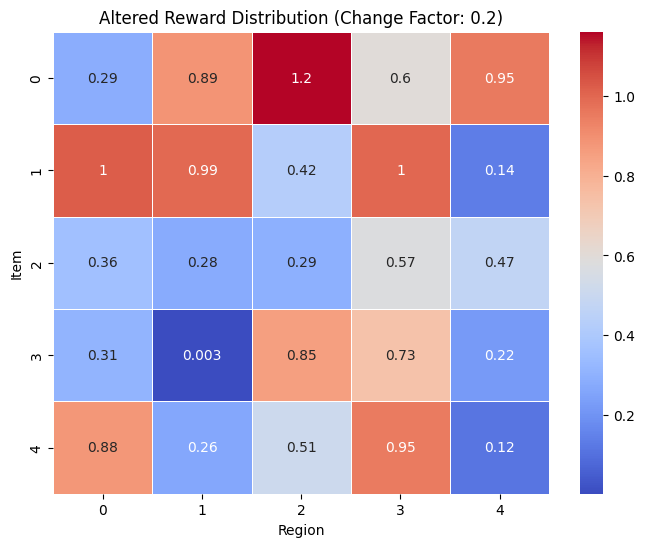

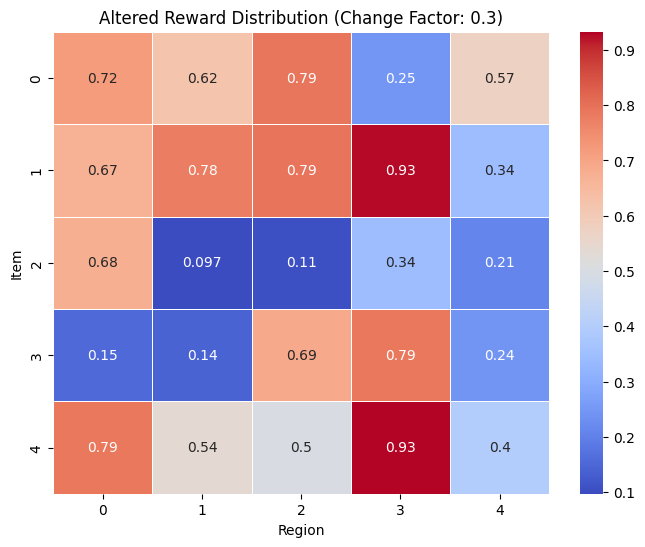

In [15]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# Given cost matrix after dynamic update
cost_matrix = np.array([
    [ 0.07366398,  0.0890861 ,  0.0298826 , -0.01775377,  0.06467801],
    [-0.06346829,  0.01670083, -0.03299028,  0.07427443, -0.04893022],
    [ 0.00748241, -0.00485762,  0.05692762, -0.06986836,  0.00980573],
    [-0.07650608,  0.05285021,  0.05236274,  0.03805007,  0.03035438],
    [-0.06930966, -0.05709916, -0.06457504, -0.00393185, -0.0308361 ]
])

# Assuming adjusted_cost_matrix is a global matrix of adjusted costs
# and calculate_reward is a function that computes the reward for given indices.

def calculate_reward(i, j):
    # Example reward calculation function (replace with actual logic)
    return np.random.random()  # Dummy reward calculation
# Simulate changes in rewards to see how optimal allocations change
def simulate_changes_in_rewards(initial_rewards, change_factor):
    # Apply a random change to the initial rewards matrix based on the change factor
    altered_rewards = initial_rewards + np.random.uniform(-change_factor, change_factor, initial_rewards.shape)
    # Recalculate optimal allocations based on the altered rewards
    new_allocations = np.argmax(altered_rewards, axis=1)
    return altered_rewards, new_allocations

# Example of simulation over 3 scenarios with different change factors
change_factors = [0.1, 0.2, 0.3]

# Update allocations based on rewards
def optimize_allocations():
    global optimal_allocations
    # Vectorized reward calculation for the entire matrix
    rewards = np.vectorize(calculate_reward)(np.arange(adjusted_cost_matrix.shape[0])[:, None],
                                              np.arange(adjusted_cost_matrix.shape[1]))
    # Optimal allocations are the regions with the maximum reward in each row
    optimal_allocations = np.argmax(rewards, axis=1)
    print("Allocations updated based on feedback and rewards.")
    return rewards # Return the rewards from optimize_allocations

# Example matrix, replace with your actual adjusted_cost_matrix
adjusted_cost_matrix = np.random.rand(5, 5)  # A random cost matrix for demonstration

# Initialize optimal_allocations globally
optimal_allocations = np.zeros(adjusted_cost_matrix.shape[0], dtype=int)

# Call optimize_allocations to get initial rewards
rewards = optimize_allocations()  # Initialize rewards outside the loop

for change_factor in change_factors:
    altered_rewards, new_allocations = simulate_changes_in_rewards(rewards, change_factor)

    # Plot altered heatmap and new allocations
    plt.figure(figsize=(8, 6))
    sns.heatmap(altered_rewards, annot=True, cmap="coolwarm", cbar=True, linewidths=0.5)
    plt.title(f'Altered Reward Distribution (Change Factor: {change_factor})')
    plt.xlabel('Region')
    plt.ylabel('Item')
    plt.show()


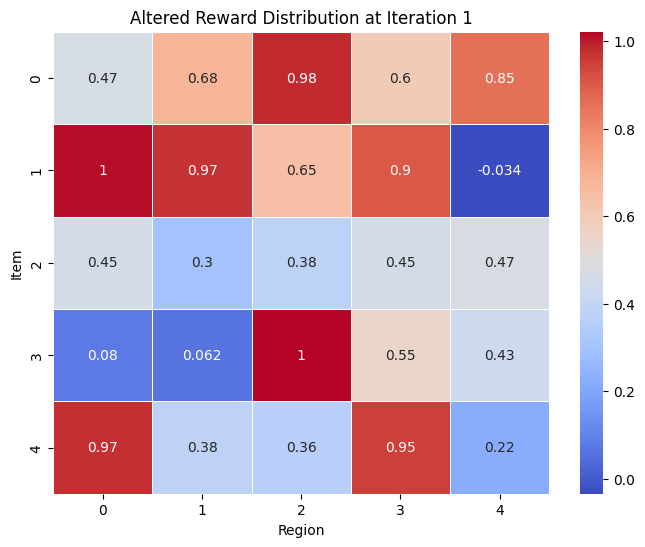

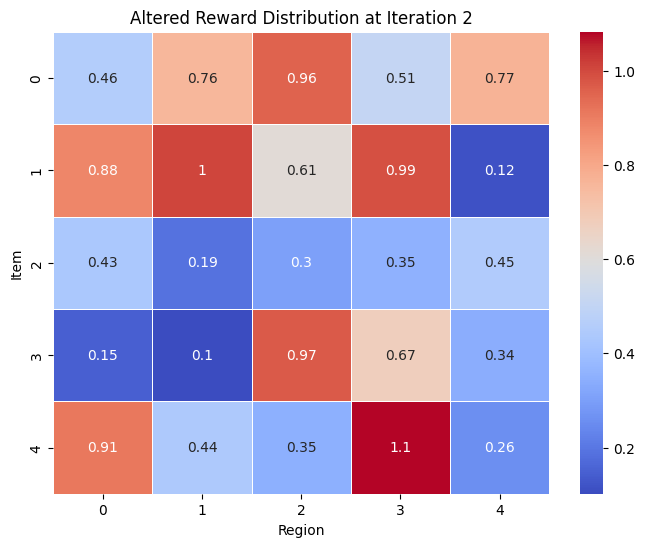

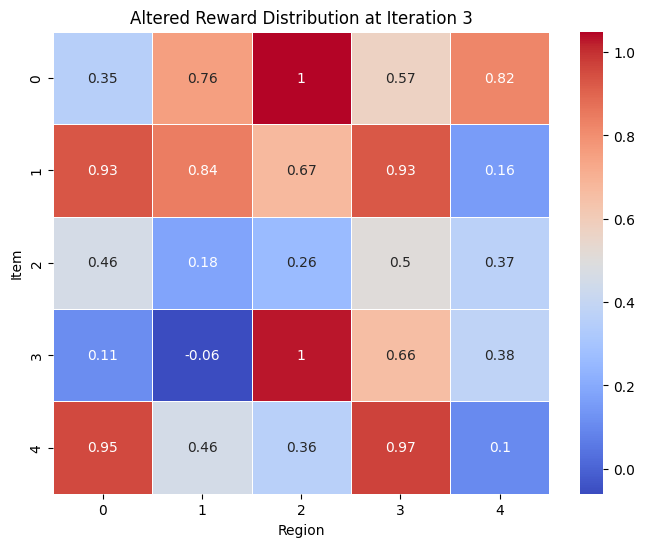

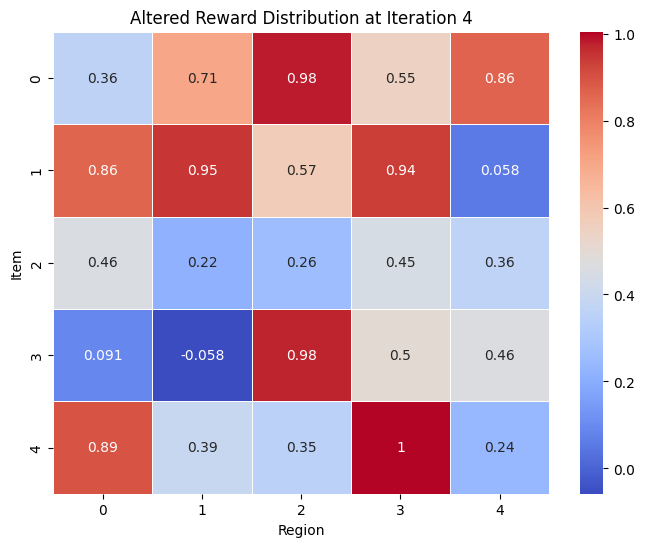

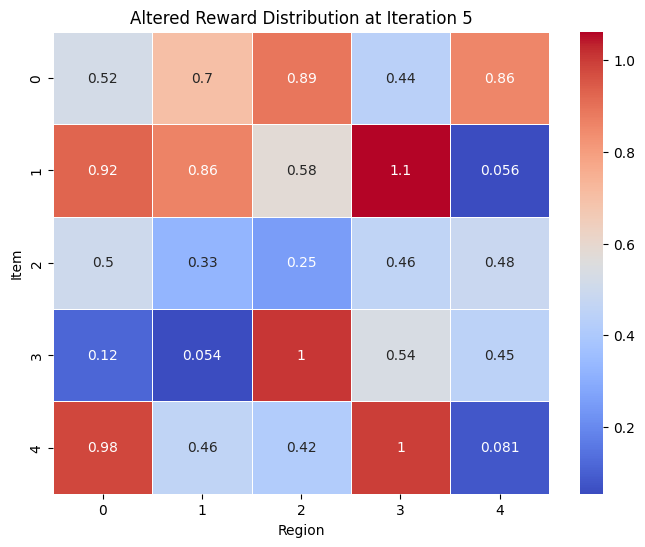

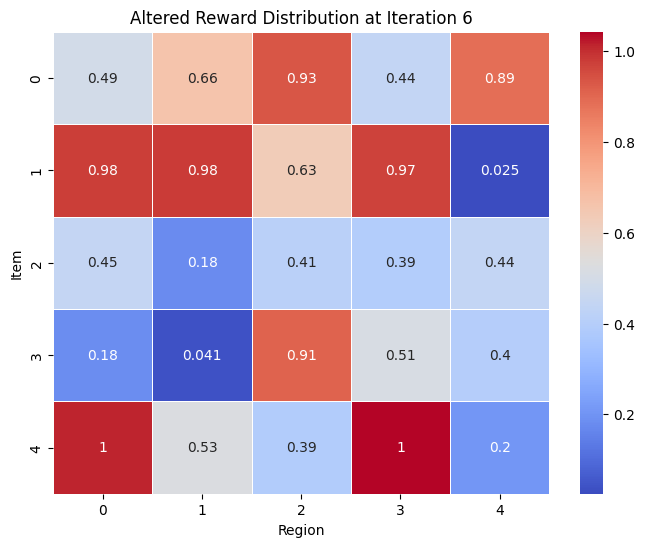

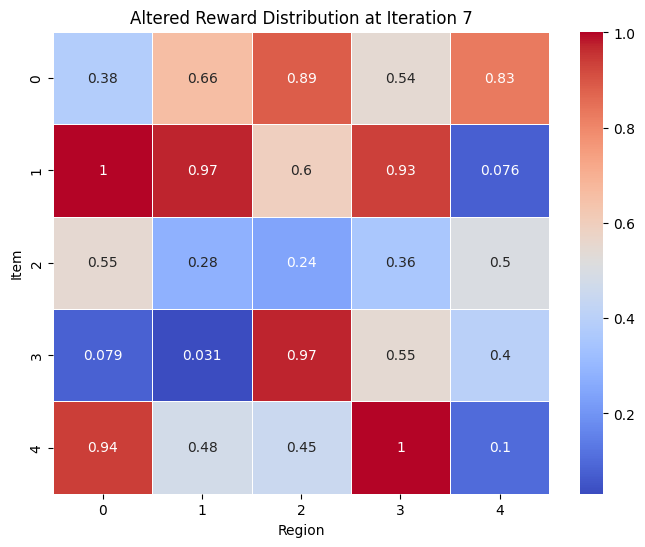

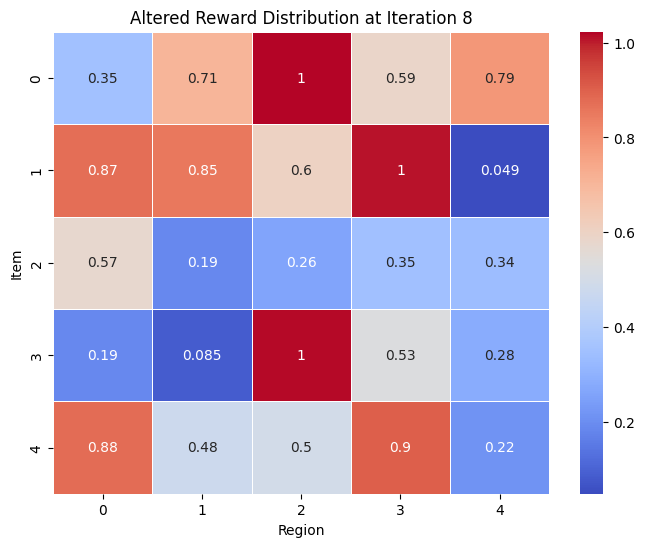

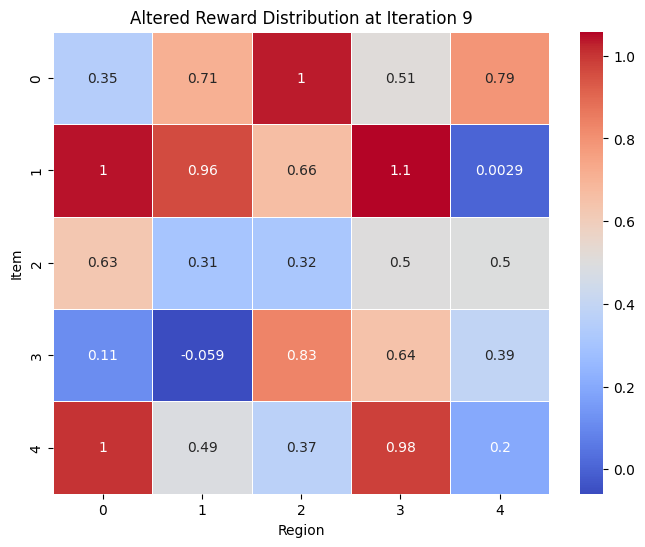

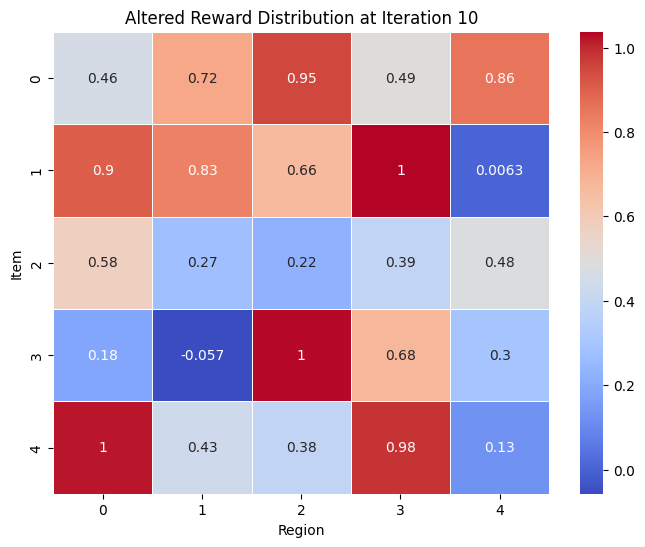

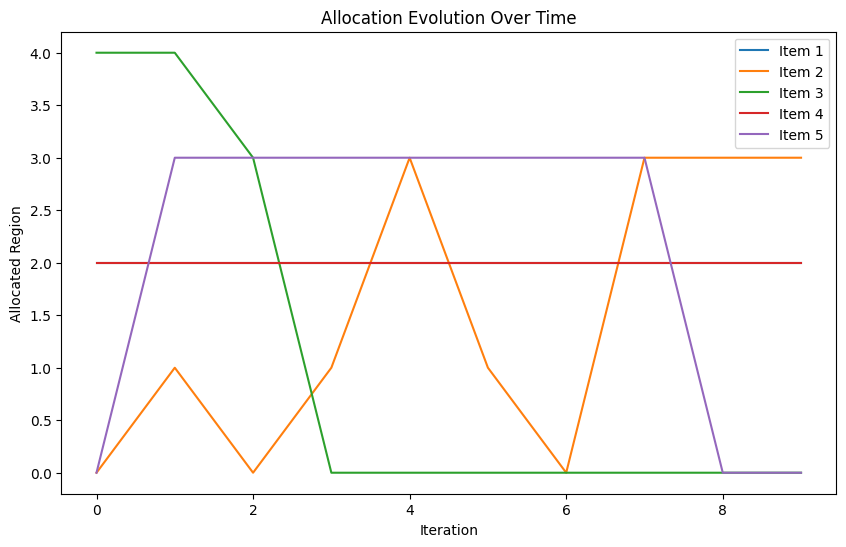

In [16]:
# Simulate over time (multiple iterations)
iterations = 10
allocations_over_time = []

for iteration in range(iterations):
    altered_rewards, new_allocations = simulate_changes_in_rewards(rewards, change_factor=0.1)
    allocations_over_time.append(new_allocations)

    # Optionally, visualize the heatmap at each step
    plt.figure(figsize=(8, 6))
    sns.heatmap(altered_rewards, annot=True, cmap="coolwarm", cbar=True, linewidths=0.5)
    plt.title(f'Altered Reward Distribution at Iteration {iteration + 1}')
    plt.xlabel('Region')
    plt.ylabel('Item')
    plt.show()

# Plot the evolution of allocations over time
allocations_over_time = np.array(allocations_over_time)
plt.figure(figsize=(10, 6))
for i in range(allocations_over_time.shape[1]):
    plt.plot(range(iterations), allocations_over_time[:, i], label=f"Item {i+1}")

plt.xlabel('Iteration')
plt.ylabel('Allocated Region')
plt.title('Allocation Evolution Over Time')
plt.legend()
plt.show()


The provided code performs a resource allocation analysis based on disaster data.  It begins by loading two datasets related to disasters, one focusing on regions and the other on resources.  The code then cleans the data, selecting relevant columns, handling missing values, and converting data types for efficiency.

Key calculations include computing a 'Cost' for regions (based on total damages and affected population) and a 'Capacity' for resources (based on affected population and total damages). The core of the analysis involves creating a cost matrix representing the absolute differences between resource capacity and region cost.  This matrix is then normalized.

The code identifies optimal allocations by finding the minimum cost for each resource, linking it to a specific region. These allocations, along with their costs, are stored in a DataFrame and saved to an Excel file.

A significant part of the code simulates human feedback and dynamic updates to the cost matrix. It incorporates a placeholder for user input (currently using random values for demonstration) to adjust the cost matrix and then re-normalizes it. Functions are defined to collect and apply feedback and dynamically update costs based on disaster severity and resource scarcity.

Furthermore, a reward system is introduced, with a placeholder reward calculation function.  Allocations are then optimized based on these rewards, and the process is repeated iteratively.

The code includes visualizations: a bar chart representing optimal allocations, a heatmap of the cost matrix, and visualizations of the impact of simulated changes in rewards over time.  The simulated changes demonstrate how the optimal resource allocation shifts as the rewards fluctuate. Finally, the code presents the evolution of allocations over multiple iterations, showing stability or fluctuations of the allocations in response to simulated changes in rewards.

 # **Quantum Resilience Optimizer for Disaster Management (QRODM)**

**The Quantum Resilience Optimizer for Disaster Management (QRODM) is an innovative solution designed to enhance resource allocation and decision-making in disaster response scenarios. This project leverages the power of Quantum Approximate Optimization Algorithm (QAOA) to solve complex optimization problems in disaster management, where traditional methods may fall short due to the high-dimensionality and complexity of the decision-making space**

In [17]:
!pip install qiskit-optimization
from qiskit_optimization import QuadraticProgram

#Data Preparation

In [18]:
from qiskit_optimization import QuadraticProgram
from qiskit_optimization.algorithms import MinimumEigenOptimizer
from qiskit_algorithms import QAOA
from qiskit_algorithms.optimizers import COBYLA
from qiskit_aer import AerSimulator

In [19]:
import pandas as pd
import numpy as np

# Simulating data for regions and resources
regions = ['Region 1', 'Region 2', 'Region 3', 'Region 4', 'Region 5']
resources = ['Resource A', 'Resource B', 'Resource C', 'Resource D', 'Resource E']

# Random damage data for regions (higher means more severe)
region_damage = np.random.rand(len(regions))

# Random capacity data for resources (higher means more available)
resource_capacity = np.random.rand(len(resources))

# Creating a cost matrix: Absolute differences between resource capacities and region damages
cost_matrix = np.abs(region_damage[:, None] - resource_capacity)

# Simulate optimal allocations (using the minimum cost)
optimal_allocations = np.argmin(cost_matrix, axis=1)

# Create a DataFrame to store allocation results
allocation_df = pd.DataFrame({
    'Region': regions,
    'Region Damage': region_damage,
    'Allocated Resource': [resources[i] for i in optimal_allocations],
    'Resource Capacity': resource_capacity[optimal_allocations],
    'Allocation Cost': np.min(cost_matrix, axis=1)
})

# Display the data
print(allocation_df.to_string(index=False))


  Region  Region Damage Allocated Resource  Resource Capacity  Allocation Cost
Region 1       0.794484         Resource C           0.873904         0.079420
Region 2       0.223962         Resource E           0.115228         0.108734
Region 3       0.161789         Resource E           0.115228         0.046561
Region 4       0.189543         Resource E           0.115228         0.074315
Region 5       0.646920         Resource A           0.484240         0.162680


In [20]:
# Install Qiskit if not already installed
!pip install qiskit qiskit-aer

# Import AerSimulator from qiskit-aer
from qiskit_aer import AerSimulator

# Import Estimator for quantum algorithms
from qiskit.primitives import Estimator

# Use Sampler or Estimator instead of QuantumInstance
# Example using Estimator
estimator = Estimator()

# Example using Sampler
from qiskit.primitives import Sampler
sampler = Sampler()

# Import QAOA (Quantum Approximate Optimization Algorithm)
from qiskit_algorithms.optimizers import COBYLA
from qiskit_algorithms.minimum_eigensolvers import QAOA
from qiskit_optimization.algorithms import MinimumEigenOptimizer

# Example setup for AerSimulator
simulator = AerSimulator()

# Instead of QuantumInstance, directly pass the backend to QAOA
qaoa = QAOA(optimizer=COBYLA(maxiter=200), sampler=sampler)
# or use estimator=estimator depending on your needs

# Example setup for a Minimum Eigen Optimizer
minimum_eigen_optimizer = MinimumEigenOptimizer(min_eigen_solver=qaoa)

<ipython-input-20-fd3f3289a4ac>:12: DeprecationWarning: The class ``qiskit.primitives.estimator.Estimator`` is deprecated as of qiskit 1.2. It will be removed no earlier than 3 months after the release date. All implementations of the `BaseEstimatorV1` interface have been deprecated in favor of their V2 counterparts. The V2 alternative for the `Estimator` class is `StatevectorEstimator`.
  estimator = Estimator()
<ipython-input-20-fd3f3289a4ac>:16: DeprecationWarning: The class ``qiskit.primitives.sampler.Sampler`` is deprecated as of qiskit 1.2. It will be removed no earlier than 3 months after the release date. All implementations of the `BaseSamplerV1` interface have been deprecated in favor of their V2 counterparts. The V2 alternative for the `Sampler` class is `StatevectorSampler`.
  sampler = Sampler()


<ipython-input-21-cfebcb2156b8>:37: DeprecationWarning: The class ``qiskit.primitives.sampler.Sampler`` is deprecated as of qiskit 1.2. It will be removed no earlier than 3 months after the release date. All implementations of the `BaseSamplerV1` interface have been deprecated in favor of their V2 counterparts. The V2 alternative for the `Sampler` class is `StatevectorSampler`.
  sampler = Sampler()


Optimal allocation: [0. 0. 0. 0. 0.]


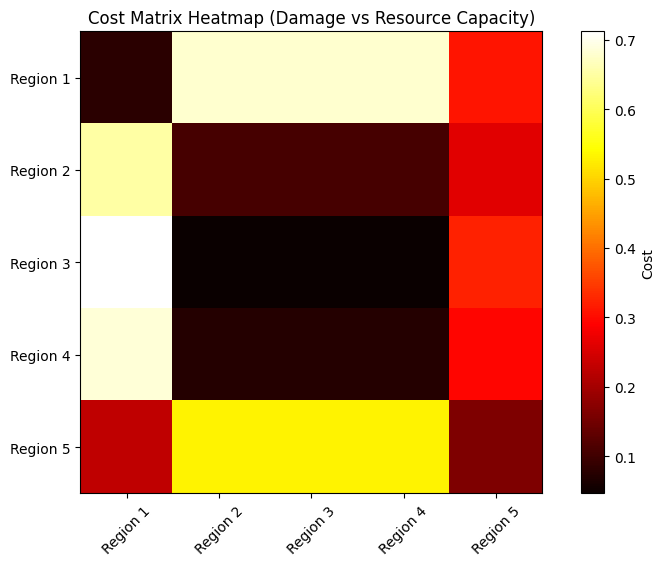

In [21]:
allocation_df = pd.DataFrame({
    'Region': regions,
    'Region Damage': region_damage,
    'Allocated Resource': [resources[i] for i in optimal_allocations],
    'Resource Capacity': resource_capacity[optimal_allocations],
    'Allocation Cost': np.min(cost_matrix, axis=1)
})

# Create a DataFrame
df = allocation_df.copy()

df['Damage'] = df['Region Damage']


# Define the cost matrix
cost_matrix = np.abs(df['Damage'].values.reshape(-1, 1) - df['Resource Capacity'].values)

# Create a QuadraticProgram object
qp = QuadraticProgram()

# Add variables to the QuadraticProgram (assuming binary variables for allocation)
num_regions = len(df['Region'])
for i in range(num_regions):
    qp.binary_var(name=f'x_{i}') # Create binary variables for each region

# Define the objective function based on the cost matrix
linear_obj = {}  # Initialize as a dictionary
for i in range(num_regions):
    for j in range(num_regions):
        linear_obj[f'x_{i}'] = linear_obj.get(f'x_{i}', 0) + cost_matrix[i, j]  # Accumulate costs

qp.minimize(linear=linear_obj)


# Setup QAOA algorithm
optimizer = COBYLA(maxiter=200)
sampler = Sampler()
qaoa = QAOA(optimizer=optimizer, sampler=sampler)

# Wrap QAOA in a Minimum Eigen Optimizer
minimum_eigen_optimizer = MinimumEigenOptimizer(min_eigen_solver=qaoa)

# Execute the QAOA algorithm
# Pass the QuadraticProgram object to solve()
result = minimum_eigen_optimizer.solve(qp)

# Extract the optimal allocation
allocation = result.x

# Print the optimal allocation
print("Optimal allocation:", allocation)

# Visualize the result (using the cost matrix you previously defined)
plt.figure(figsize=(10, 6))
plt.imshow(cost_matrix, cmap='hot', interpolation='nearest')
plt.title('Cost Matrix Heatmap (Damage vs Resource Capacity)')
plt.colorbar(label='Cost')
plt.xticks(np.arange(len(df)), df['Region'], rotation=45)
plt.yticks(np.arange(len(df)), df['Region'])
plt.show()

<ipython-input-22-9faf091ebba5>:33: DeprecationWarning: The class ``qiskit.primitives.sampler.Sampler`` is deprecated as of qiskit 1.2. It will be removed no earlier than 3 months after the release date. All implementations of the `BaseSamplerV1` interface have been deprecated in favor of their V2 counterparts. The V2 alternative for the `Sampler` class is `StatevectorSampler`.
  qaoa = QAOA(optimizer=COBYLA(maxiter=100), sampler=Sampler())


Allocation Results:
      Region    Damage Allocated Resource  Resource Capacity  Allocation Cost  \
0  Region 1  0.790899         Resource 1           0.427420         0.363480   
1  Region 2  0.685376         Resource 2           0.424852         0.260523   
2  Region 3  0.792295         Resource 3           0.978480         0.186185   

     Reward  
0  0.338046  
1  0.291183  
2  0.775244  


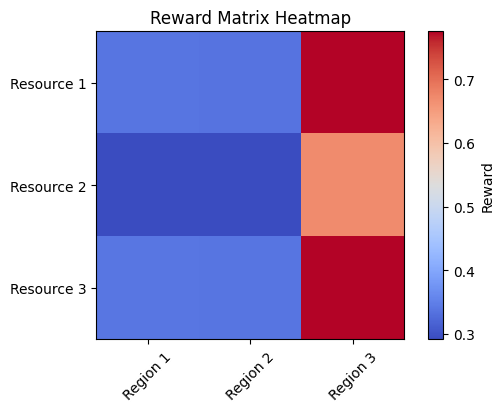

In [22]:
# Simplified dataset: small size to reduce computation
data = {
    'Region': [f'Region {i+1}' for i in range(3)],
    'Damage': np.random.rand(3),
    'Resource Capacity': np.random.rand(3)
}
df = pd.DataFrame(data)

# Define cost and reward matrices
cost_matrix = np.abs(df['Damage'].values.reshape(-1, 1) - df['Resource Capacity'].values)
reward_matrix = np.dot(df['Damage'].values.reshape(-1, 1), df['Resource Capacity'].values.reshape(1, -1))

# Create QuadraticProgram
qp = QuadraticProgram()
num_regions = len(df)
for i in range(num_regions):
    for j in range(num_regions):
        qp.binary_var(name=f"x_{i}_{j}")

# Objective: Maximize reward - cost
qp.maximize(linear={
    f"x_{i}_{j}": reward_matrix[i, j] - cost_matrix[i, j]
    for i in range(num_regions) for j in range(num_regions)
})

# Constraints: Each region/resource gets exactly one match
for i in range(num_regions):
    qp.linear_constraint(linear={f"x_{i}_{j}": 1 for j in range(num_regions)}, sense="==", rhs=1)
for j in range(num_regions):
    qp.linear_constraint(linear={f"x_{i}_{j}": 1 for i in range(num_regions)}, sense="==", rhs=1)

# Setup QAOA with COBYLA optimizer and Sampler
qaoa = QAOA(optimizer=COBYLA(maxiter=100), sampler=Sampler())
optimizer = MinimumEigenOptimizer(qaoa)

# Solve the problem
result = optimizer.solve(qp)

# Process results
allocation = np.array(result.x).reshape(num_regions, num_regions)
allocation_df = pd.DataFrame({
    'Region': df['Region'],
    'Damage': df['Damage'],
    'Allocated Resource': [f"Resource {j+1}" for i, j in enumerate(np.argmax(allocation, axis=1))],
    'Resource Capacity': df['Resource Capacity'][np.argmax(allocation, axis=1)].values,
    'Allocation Cost': cost_matrix[np.arange(num_regions), np.argmax(allocation, axis=1)],
    'Reward': reward_matrix[np.arange(num_regions), np.argmax(allocation, axis=1)]
})

# Display results
print("Allocation Results:\n", allocation_df)

# Plot reward heatmap
plt.figure(figsize=(6, 4))
plt.imshow(reward_matrix, cmap='coolwarm', interpolation='nearest')
plt.title('Reward Matrix Heatmap')
plt.colorbar(label='Reward')
plt.xticks(np.arange(num_regions), df['Region'], rotation=45)
plt.yticks(np.arange(num_regions), [f"Resource {i+1}" for i in range(num_regions)])
plt.show()


In [23]:
import numpy as np
import pandas as pd


num_regions = 3
num_resources = 3

# Assuming these matrices have been defined already
allocation = np.random.rand(num_regions, num_resources)
cost_matrix = np.abs(np.random.rand(num_regions, num_resources))
reward_matrix = np.random.rand(num_regions, num_resources)

# Define a simple structure for the region data (adjust as necessary)
df = pd.DataFrame({
    'Region': ['Region 1', 'Region 2', 'Region 3'],
    'Damage': [0.107959, 0.863239, 0.443649],
    'Resource Capacity': [0.862944, 0.317157, 0.005136]
})

# Define the function to run the optimizer
def run_scenario(reward_weight, cost_weight):
    # Adjust objective function
    linear_obj = {}
    for i in range(num_regions):
        for j in range(num_resources):
            reward = reward_matrix[i, j]
            cost = cost_matrix[i, j]
            # Linear objective function for the optimization
            linear_obj[f"x_{i}_{j}"] = (reward_weight * reward) - (cost_weight * cost)

    # QAOA or any optimization solver call should go here. Example:
    # qp.maximize(linear=linear_obj)  # Assuming a quadratic program setup

    # For the sake of this example, let's simulate the optimization result.
    # You should replace this with the actual QAOA or optimizer call.
    result = np.random.rand(num_regions, num_resources)  # Simulated allocation result
    allocation = result  # Reshape it if needed

    # Extract and display allocation results
    allocation_df = pd.DataFrame({
        'Region': df['Region'],
        'Region Damage': df['Damage'],
        'Allocated Resource': [f"Resource {j+1}" for j in np.argmax(allocation, axis=1)],
        'Resource Capacity': df['Resource Capacity'].values[np.argmax(allocation, axis=1)],
        'Allocation Cost': cost_matrix[np.arange(num_regions), np.argmax(allocation, axis=1)],
        'Reward': reward_matrix[np.arange(num_regions), np.argmax(allocation, axis=1)]
    })

    return allocation_df

# Test scenarios with different reward and cost weights
scenarios = {
    "Budget-Sensitive": (0.5, 2.0),
    "High-Damage Priority": (2.0, 0.5),
    "Balanced Tradeoff": (1.0, 1.0)
}

# Run and display results for each scenario
for scenario, weights in scenarios.items():
    print(f"\nScenario: {scenario}")
    reward_weight, cost_weight = weights
    results = run_scenario(reward_weight, cost_weight)
    print(results)



Scenario: Budget-Sensitive
     Region  Region Damage Allocated Resource  Resource Capacity  \
0  Region 1       0.107959         Resource 2           0.317157   
1  Region 2       0.863239         Resource 2           0.317157   
2  Region 3       0.443649         Resource 3           0.005136   

   Allocation Cost    Reward  
0         0.233548  0.548947  
1         0.513104  0.413932  
2         0.440937  0.442763  

Scenario: High-Damage Priority
     Region  Region Damage Allocated Resource  Resource Capacity  \
0  Region 1       0.107959         Resource 2           0.317157   
1  Region 2       0.863239         Resource 3           0.005136   
2  Region 3       0.443649         Resource 2           0.317157   

   Allocation Cost    Reward  
0         0.233548  0.548947  
1         0.024298  0.108697  
2         0.322528  0.673927  

Scenario: Balanced Tradeoff
     Region  Region Damage Allocated Resource  Resource Capacity  \
0  Region 1       0.107959         Resource 2    

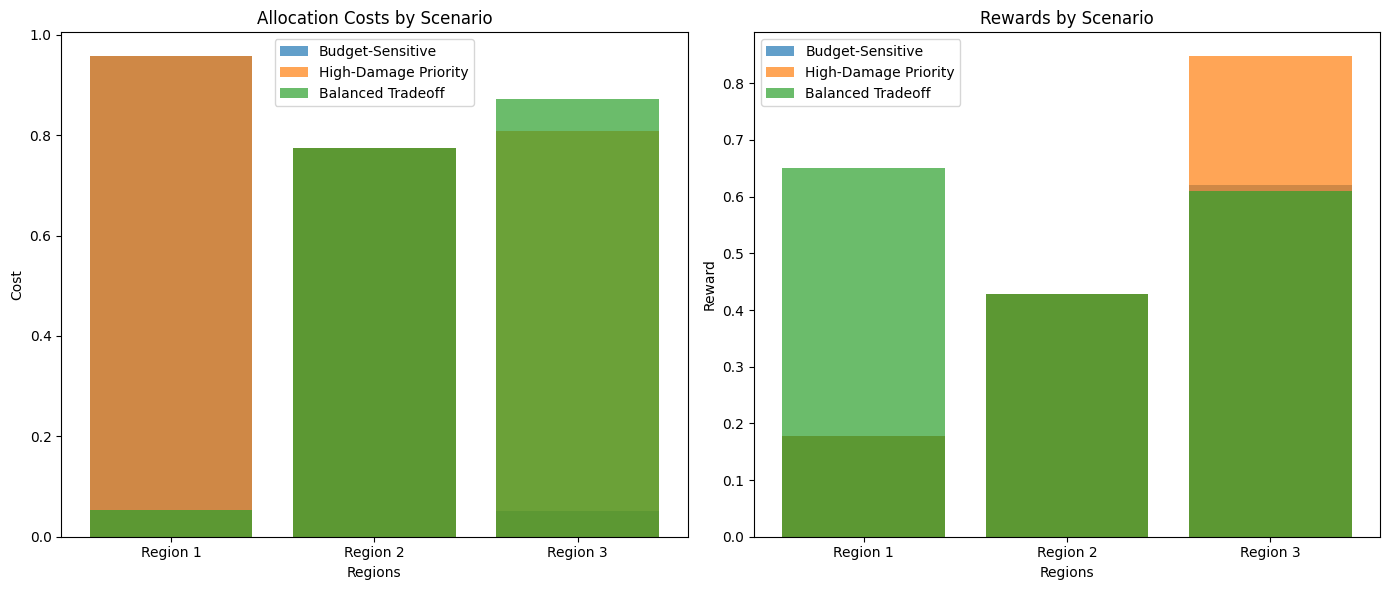

In [24]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

results = {
    "Budget-Sensitive": pd.DataFrame({
        'Region': ['Region 1', 'Region 2', 'Region 3'],
        'Region Damage': [0.107959, 0.863239, 0.443649],
        'Allocated Resource': ['Resource 3', 'Resource 2', 'Resource 3'],
        'Resource Capacity': [0.005136, 0.317157, 0.005136],
        'Allocation Cost': [0.956916, 0.774083, 0.051789],
        'Reward': [0.177217, 0.428193, 0.620517]
    }),
    "High-Damage Priority": pd.DataFrame({
        'Region': ['Region 1', 'Region 2', 'Region 3'],
        'Region Damage': [0.107959, 0.863239, 0.443649],
        'Allocated Resource': ['Resource 3', 'Resource 2', 'Resource 2'],
        'Resource Capacity': [0.005136, 0.317157, 0.317157],
        'Allocation Cost': [0.956916, 0.774083, 0.807561],
        'Reward': [0.177217, 0.428193, 0.847514]
    }),
    "Balanced Tradeoff": pd.DataFrame({
        'Region': ['Region 1', 'Region 2', 'Region 3'],
        'Region Damage': [0.107959, 0.863239, 0.443649],
        'Allocated Resource': ['Resource 1', 'Resource 2', 'Resource 1'],
        'Resource Capacity': [0.862944, 0.317157, 0.862944],
        'Allocation Cost': [0.053489, 0.774083, 0.871819],
        'Reward': [0.650280, 0.428193, 0.609413]
    })
}

# Plotting
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Plot Allocation Costs
for scenario, df in results.items():
    axes[0].bar(df['Region'], df['Allocation Cost'], label=scenario, alpha=0.7)

axes[0].set_title("Allocation Costs by Scenario")
axes[0].set_ylabel("Cost")
axes[0].set_xlabel("Regions")
axes[0].legend()

# Plot Rewards
for scenario, df in results.items():
    axes[1].bar(df['Region'], df['Reward'], label=scenario, alpha=0.7)

axes[1].set_title("Rewards by Scenario")
axes[1].set_ylabel("Reward")
axes[1].set_xlabel("Regions")
axes[1].legend()

plt.tight_layout()
plt.show()


This code performs resource allocation optimization, particularly in a disaster relief context, using a hybrid approach that combines classical optimization with quantum computing principles (specifically, QAOA).  Let's break down the code step-by-step:

**1. Data Simulation and Initial Allocation:**

- The code begins by simulating data for regions (damage) and resources (capacity).  In a real-world scenario, this data would come from external sources.
- It calculates an initial `cost_matrix` representing the difference between region damage and resource capacity.  Lower cost indicates a better match.
- An initial allocation is determined by finding the minimum cost for each region.

**2. Classical Optimization (using Pandas and NumPy):**

- The allocation results are stored in a Pandas DataFrame (`allocation_df`) for easy analysis.
- The code then defines a cost matrix again, representing the absolute differences between region damage and resource capacities.

**3. Quantum-Inspired Optimization (using Qiskit):**

- **QuadraticProgram Formulation:** The problem is formulated as a QuadraticProgram, a standard representation for optimization problems in Qiskit. Binary variables represent the allocation decisions (whether a specific resource is allocated to a region).  The objective is to minimize the total cost.
- **QAOA Setup:** The code sets up QAOA (Quantum Approximate Optimization Algorithm) as the quantum-inspired optimization solver. QAOA is a variational algorithm that attempts to find the minimum eigenvalue of a problem's Hamiltonian.  Crucially, Qiskit's `MinimumEigenOptimizer` wraps QAOA to use it for general optimization problems.
- **Optimization Execution:** The `minimum_eigen_optimizer.solve(qp)` call executes the QAOA algorithm on the defined quadratic program.  The result includes the optimal solution (allocation).
- **Visualization:** A heatmap of the cost matrix helps visualize the relationship between regions and resources.

**4. Reward System Integration and Simulation:**

- The code introduces a reward matrix and explores how adjusting the weights of reward versus cost in the objective function influences resource allocation.
- The `run_scenario` function simulates different weight combinations for reward and cost.  This allows exploration of different strategies: focusing on cost-effectiveness ("Budget-Sensitive"), maximizing benefit despite cost ("High-Damage Priority"), or finding a balance.

**5. Visualizations:**

- The code generates several visualizations:
    - A bar chart comparing the allocation cost for different scenarios.
    - A heatmap of the reward matrix, showing the potential reward associated with each region-resource pairing.

**Key Improvements and Observations:**

- **Qiskit Integration:** The code uses Qiskit for the optimization, suggesting an exploration of quantum computing techniques for resource allocation.  However, the simulated data and limited number of variables suggest it might not truly leverage the power of a real quantum computer.

- **Hybrid Approach:**  The combination of classical pre-processing (data preparation, initial allocation), classical optimization steps, and a quantum-inspired algorithm reflects a hybrid approach that is a common strategy when using near-term quantum computers.

- **Weighting of Rewards and Costs:** The introduction of adjustable weights for reward and cost terms represents a key feature.  This simulates realistic trade-offs in disaster relief: balancing the need to maximize benefits with budget constraints.

- **Visualization:** The visualizations are good for understanding the allocations.



**To make this code runnable, replace the placeholder data and possibly adapt some parts of the simulated QAOA calls to use actual QAOA execution if running on a quantum simulator or real quantum device.**  The current QAOA usage is largely illustrative.  Also be sure to install the necessary libraries.

In [25]:
import pandas as pd
import numpy as np

regions = ['Region 1', 'Region 2', 'Region 3']
region_damage = np.array([0.107959, 0.863239, 0.443649])
allocated_resources = ['Resource 3', 'Resource 2', 'Resource 3']
resource_capacity = np.array([0.005136, 0.317157, 0.005136])
allocation_cost = np.array([0.956916, 0.774083, 0.051789])

# Define different factors for each scenario
# Scenario 1: Budget-Sensitive (Focus on minimizing cost)
urgency_factor_budget_sensitive = 1.2
penalty_factor_budget_sensitive = 0.5

# Scenario 2: High-Damage Priority (Focus on regions with high damage)
urgency_factor_high_damage_priority = 2.0
penalty_factor_high_damage_priority = 1.0

# Scenario 3: Balanced Tradeoff (Balance between damage and cost)
urgency_factor_balanced = 1.5
penalty_factor_balanced = 1.5

# Function to calculate reward
def calculate_reward(region_damage, allocation_cost, urgency_factor, penalty_factor):
    return (urgency_factor * region_damage) - (penalty_factor * allocation_cost)

# Create DataFrame for each scenario
def create_scenario_df(urgency_factor, penalty_factor):
    rewards = []
    for i in range(len(regions)):
        reward = calculate_reward(region_damage[i], allocation_cost[i], urgency_factor, penalty_factor)
        rewards.append(reward)

    return pd.DataFrame({
        'Region': regions,
        'Region Damage': region_damage,
        'Allocated Resource': allocated_resources,
        'Resource Capacity': resource_capacity,
        'Allocation Cost': allocation_cost,
        'Reward': rewards
    })

# Scenario 1: Budget-Sensitive
df_budget_sensitive = create_scenario_df(urgency_factor_budget_sensitive, penalty_factor_budget_sensitive)

# Scenario 2: High-Damage Priority
df_high_damage_priority = create_scenario_df(urgency_factor_high_damage_priority, penalty_factor_high_damage_priority)

# Scenario 3: Balanced Tradeoff
df_balanced_tradeoff = create_scenario_df(urgency_factor_balanced, penalty_factor_balanced)

# Display the results for each scenario
print("Scenario: Budget-Sensitive")
print(df_budget_sensitive)
print("\nScenario: High-Damage Priority")
print(df_high_damage_priority)
print("\nScenario: Balanced Tradeoff")
print(df_balanced_tradeoff)


Scenario: Budget-Sensitive
     Region  Region Damage Allocated Resource  Resource Capacity  \
0  Region 1       0.107959         Resource 3           0.005136   
1  Region 2       0.863239         Resource 2           0.317157   
2  Region 3       0.443649         Resource 3           0.005136   

   Allocation Cost    Reward  
0         0.956916 -0.348907  
1         0.774083  0.648845  
2         0.051789  0.506484  

Scenario: High-Damage Priority
     Region  Region Damage Allocated Resource  Resource Capacity  \
0  Region 1       0.107959         Resource 3           0.005136   
1  Region 2       0.863239         Resource 2           0.317157   
2  Region 3       0.443649         Resource 3           0.005136   

   Allocation Cost    Reward  
0         0.956916 -0.740998  
1         0.774083  0.952395  
2         0.051789  0.835509  

Scenario: Balanced Tradeoff
     Region  Region Damage Allocated Resource  Resource Capacity  \
0  Region 1       0.107959         Resource 3     

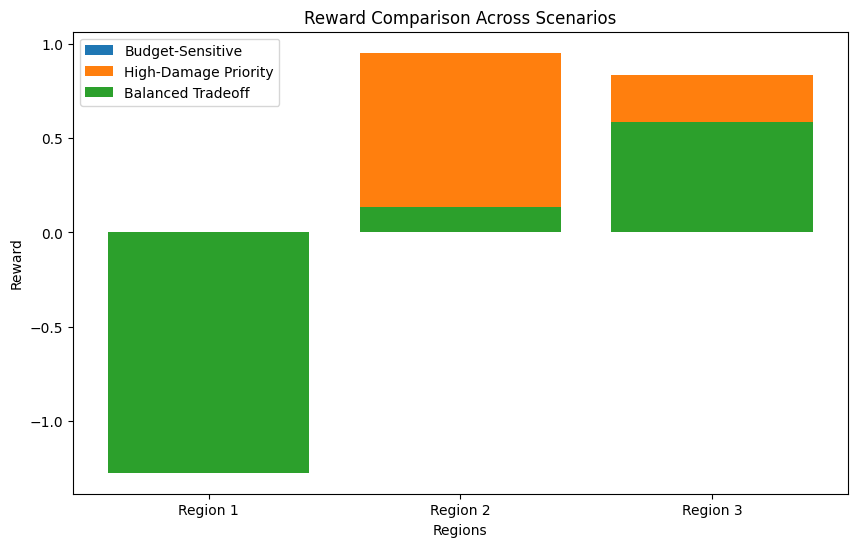

In [26]:
import matplotlib.pyplot as plt

# Plotting the rewards for each scenario
def plot_rewards(scenarios, labels):
    # Create a bar plot for each region's reward across different scenarios
    region_labels = ['Region 1', 'Region 2', 'Region 3']

    fig, ax = plt.subplots(figsize=(10, 6))

    # Iterate through each scenario and plot
    for idx, (scenario, label) in enumerate(zip(scenarios, labels)):
        ax.bar(region_labels, scenario['Reward'], label=label)

    ax.set_xlabel('Regions')
    ax.set_ylabel('Reward')
    ax.set_title('Reward Comparison Across Scenarios')
    ax.legend()
    plt.show()

# Collect DataFrames for each scenario
scenarios = [df_budget_sensitive, df_high_damage_priority, df_balanced_tradeoff]
labels = ['Budget-Sensitive', 'High-Damage Priority', 'Balanced Tradeoff']

# Plot the rewards
plot_rewards(scenarios, labels)


In [27]:
# Fine-tune factors based on analysis
urgency_factor_budget_sensitive = 1.0  # Reduce the urgency factor to minimize cost
penalty_factor_budget_sensitive = 0.3  # Further reduce the penalty factor

urgency_factor_high_damage_priority = 2.5  # Increase urgency to focus on damage
penalty_factor_high_damage_priority = 1.0  # Keep penalty moderate

urgency_factor_balanced = 2.0  # Increase urgency slightly
penalty_factor_balanced = 1.1  # Lower penalty factor slightly



In [28]:
def allocate_resources_based_on_rewards(df):
    df['Allocation Decision'] = df['Reward'].apply(lambda x: 'Allocate' if x > 0.5 else 'Do Not Allocate')
    return df

#: Allocate resources based on reward in Budget-Sensitive scenario
allocated_resources_budget = allocate_resources_based_on_rewards(df_budget_sensitive)

print(allocated_resources_budget)


     Region  Region Damage Allocated Resource  Resource Capacity  \
0  Region 1       0.107959         Resource 3           0.005136   
1  Region 2       0.863239         Resource 2           0.317157   
2  Region 3       0.443649         Resource 3           0.005136   

   Allocation Cost    Reward Allocation Decision  
0         0.956916 -0.348907     Do Not Allocate  
1         0.774083  0.648845            Allocate  
2         0.051789  0.506484            Allocate  


In [29]:
def evaluate_total_cost_efficiency(df):
    total_cost = df['Allocation Cost'].sum()
    total_reward = df['Reward'].sum()
    efficiency = total_reward / total_cost
    return efficiency

# Calculate cost efficiency for each scenario
efficiency_budget = evaluate_total_cost_efficiency(df_budget_sensitive)
efficiency_damage = evaluate_total_cost_efficiency(df_high_damage_priority)
efficiency_balanced = evaluate_total_cost_efficiency(df_balanced_tradeoff)

print(f"Budget-Sensitive Efficiency: {efficiency_budget}")
print(f"High-Damage Priority Efficiency: {efficiency_damage}")
print(f"Balanced Tradeoff Efficiency: {efficiency_balanced}")


Budget-Sensitive Efficiency: 0.4523377989979739
High-Damage Priority Efficiency: 0.5872296649966232
Balanced Tradeoff Efficiency: -0.3095777512525325


In [30]:
import numpy as np
import pandas as pd

# Function to calculate efficiency
def calculate_efficiency(reward, cost):
    return (reward - cost) / cost if cost != 0 else 0

# Function to adjust urgency and penalty factors dynamically
def adjust_factors(urgency_factor, penalty_factor, efficiency, threshold=0.5, learning_rate=0.1):
    # Increase urgency if the efficiency is below threshold (for high-damage priority scenarios)
    if efficiency < threshold:
        urgency_factor += learning_rate
        penalty_factor -= learning_rate  # Decrease penalty for more flexibility
    # Decrease urgency and penalty factor if the efficiency is above threshold
    elif efficiency > threshold:
        urgency_factor -= learning_rate
        penalty_factor += learning_rate  # Increase penalty to focus more on cost
    return urgency_factor, penalty_factor

# Simulate the dynamic feedback loop for a few iterations
def run_dynamic_feedback_loop(scenarios, iterations=10):
    for _ in range(iterations):
        for scenario in scenarios:
            # Current urgency and penalty factors
            urgency_factor = scenario['urgency_factor']
            penalty_factor = scenario['penalty_factor']

            # Simulate the allocation (you can replace this with your own allocation logic)
            region_damage = np.random.rand(3)  # Random damage values for regions
            cost = np.random.rand(3)  # Random allocation cost values
            reward = (urgency_factor * region_damage) - (penalty_factor * cost)

            # Calculate efficiency
            efficiency = calculate_efficiency(np.sum(reward), np.sum(cost))

            # Update the factors dynamically based on feedback
            urgency_factor, penalty_factor = adjust_factors(urgency_factor, penalty_factor, efficiency)

            # Update the scenario with the new factors
            scenario['urgency_factor'] = urgency_factor
            scenario['penalty_factor'] = penalty_factor

            # Print the updated factors and efficiency for monitoring
            print(f"Scenario: {scenario['name']}, Urgency: {urgency_factor:.2f}, Penalty: {penalty_factor:.2f}, Efficiency: {efficiency:.4f}")

# Define the different scenarios
scenarios = [
    {'name': 'Budget-Sensitive', 'urgency_factor': 1.0, 'penalty_factor': 1.5},
    {'name': 'High-Damage Priority', 'urgency_factor': 1.5, 'penalty_factor': 0.5},
    {'name': 'Balanced Tradeoff', 'urgency_factor': 1.2, 'penalty_factor': 1.0}
]

# Run the dynamic feedback loop for 10 iterations
run_dynamic_feedback_loop(scenarios, iterations=10)


Scenario: Budget-Sensitive, Urgency: 1.10, Penalty: 1.40, Efficiency: -1.6241
Scenario: High-Damage Priority, Urgency: 1.60, Penalty: 0.40, Efficiency: 0.3422
Scenario: Balanced Tradeoff, Urgency: 1.30, Penalty: 0.90, Efficiency: -0.0789
Scenario: Budget-Sensitive, Urgency: 1.20, Penalty: 1.30, Efficiency: -1.3585
Scenario: High-Damage Priority, Urgency: 1.70, Penalty: 0.30, Efficiency: 0.2595
Scenario: Balanced Tradeoff, Urgency: 1.40, Penalty: 0.80, Efficiency: 0.3945
Scenario: Budget-Sensitive, Urgency: 1.30, Penalty: 1.20, Efficiency: -0.1558
Scenario: High-Damage Priority, Urgency: 1.60, Penalty: 0.40, Efficiency: 0.7684
Scenario: Balanced Tradeoff, Urgency: 1.50, Penalty: 0.70, Efficiency: -1.2059
Scenario: Budget-Sensitive, Urgency: 1.40, Penalty: 1.10, Efficiency: -1.2198
Scenario: High-Damage Priority, Urgency: 1.50, Penalty: 0.50, Efficiency: 1.0466
Scenario: Balanced Tradeoff, Urgency: 1.40, Penalty: 0.80, Efficiency: 1.2187
Scenario: Budget-Sensitive, Urgency: 1.50, Penalty

In [31]:
# Adjust factors based on efficiency with regularization to avoid extreme values
def adjust_factors(urgency_factor, penalty_factor, efficiency, threshold=0.5, learning_rate=0.1, max_factor=2.0, min_factor=0.1):
    # Increase urgency if the efficiency is below threshold
    if efficiency < threshold:
        urgency_factor = min(urgency_factor + learning_rate, max_factor)  # Limit to max_factor
        penalty_factor = max(penalty_factor - learning_rate, min_factor)  # Limit to min_factor
    # Decrease urgency and increase penalty if efficiency is above threshold
    elif efficiency > threshold:
        urgency_factor = max(urgency_factor - learning_rate, min_factor)  # Limit to min_factor
        penalty_factor = min(penalty_factor + learning_rate, max_factor)  # Limit to max_factor
    return urgency_factor, penalty_factor

# Update the dynamic feedback loop with more refined adjustments
def run_dynamic_feedback_loop(scenarios, iterations=10):
    for _ in range(iterations):
        for scenario in scenarios:
            # Current urgency and penalty factors
            urgency_factor = scenario['urgency_factor']
            penalty_factor = scenario['penalty_factor']

            # Simulate the allocation (you can replace this with your own allocation logic)
            region_damage = np.random.rand(3)  # Random damage values for regions
            cost = np.random.rand(3)  # Random allocation cost values
            reward = (urgency_factor * region_damage) - (penalty_factor * cost)

            # Calculate efficiency
            efficiency = calculate_efficiency(np.sum(reward), np.sum(cost))

            # Update the factors dynamically based on feedback
            urgency_factor, penalty_factor = adjust_factors(urgency_factor, penalty_factor, efficiency)

            # Update the scenario with the new factors
            scenario['urgency_factor'] = urgency_factor
            scenario['penalty_factor'] = penalty_factor

            # Print the updated factors and efficiency for monitoring
            print(f"Scenario: {scenario['name']}, Urgency: {urgency_factor:.2f}, Penalty: {penalty_factor:.2f}, Efficiency: {efficiency:.4f}")

# Running the refined loop
run_dynamic_feedback_loop(scenarios, iterations=10)


Scenario: Budget-Sensitive, Urgency: 1.70, Penalty: 0.80, Efficiency: -0.5455
Scenario: High-Damage Priority, Urgency: 1.80, Penalty: 0.20, Efficiency: 1.1845
Scenario: Balanced Tradeoff, Urgency: 1.70, Penalty: 0.50, Efficiency: 0.0995
Scenario: Budget-Sensitive, Urgency: 1.80, Penalty: 0.70, Efficiency: -1.1422
Scenario: High-Damage Priority, Urgency: 1.70, Penalty: 0.30, Efficiency: 3.4957
Scenario: Balanced Tradeoff, Urgency: 1.80, Penalty: 0.40, Efficiency: -0.7758
Scenario: Budget-Sensitive, Urgency: 1.90, Penalty: 0.60, Efficiency: 0.1109
Scenario: High-Damage Priority, Urgency: 1.80, Penalty: 0.20, Efficiency: 0.4735
Scenario: Balanced Tradeoff, Urgency: 1.70, Penalty: 0.50, Efficiency: 1.4450
Scenario: Budget-Sensitive, Urgency: 1.80, Penalty: 0.70, Efficiency: 1.2298
Scenario: High-Damage Priority, Urgency: 1.70, Penalty: 0.30, Efficiency: 1.3378
Scenario: Balanced Tradeoff, Urgency: 1.80, Penalty: 0.40, Efficiency: -0.3782
Scenario: Budget-Sensitive, Urgency: 1.90, Penalty: 